In [240]:
import numpy as np
import pandas as pd

In [241]:
mr = pd.read_csv(r"C:\Users\lenovo\Python data\Imarticus Learning\mushroomsDT.csv")
pd.set_option("display.max_columns" ,None)

In [242]:
mr.shape

(8124, 23)

In [243]:
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [244]:
mr.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [245]:
mr['class'] = mr['class'].replace({"p":0,"e":1})

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [247]:
mr[mr.select_dtypes(include = ['object']).columns] = mr[mr.select_dtypes(include = ['object']).columns].apply (le.fit_transform)

In [248]:

mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [249]:
from sklearn.model_selection import train_test_split

In [250]:
mr_train , mr_test = train_test_split(mr,test_size=0.2)

In [251]:
mr_train_x = mr_train.iloc[:,1:]
mr_train_y = mr_train.iloc[:,0]

In [252]:
mr_test_x = mr_test.iloc[:,1:]
mr_test_y = mr_test.iloc[:,0]

In [253]:
mr_test_y

6790    0
5236    0
2767    1
5564    0
998     1
       ..
7665    1
6258    0
4383    0
1455    1
7258    1
Name: class, Length: 1625, dtype: int64

In [254]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()                     # Default as gini

In [255]:
dt.fit(mr_train_x , mr_train_y)

DecisionTreeClassifier()

In [256]:
pred = dt.predict(mr_test_x)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [257]:
pred.shape

(1625,)

In [258]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mr_test_y,pred)

array([[796,   0],
       [  0, 829]], dtype=int64)

In [259]:
from sklearn.metrics import accuracy_score
accuracy_score(mr_test_y,pred) *100

100.0

In [260]:
from sklearn.metrics import precision_score
precision_score(mr_test_y,pred) *100

100.0

In [261]:
from sklearn.metrics import f1_score
f1_score(mr_test_y,pred) *100

100.0

In [262]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [263]:
roc_auc_score(mr_test_y,pred)*100

100.0

In [264]:
roc_curve(mr_test_y,pred)

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [265]:
pred_prob = dt.predict_proba(mr_test_x)
pred_prob


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [266]:
pred_prob.shape

(1625, 2)

In [267]:
fpr,tpr,ther = roc_curve(mr_test_y,pred_prob[:,1])
fpr,tpr,ther

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

In [268]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC IS 100.0 ')

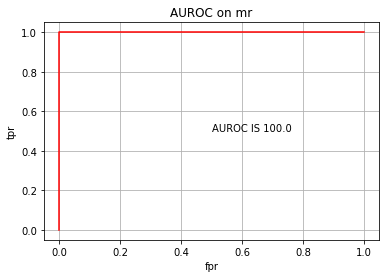

In [269]:
plt.plot(fpr,tpr,color = 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on mr')
plt.grid()
plt.text(x=.5,y=.5, s='AUROC IS 100.0 ')

# feature importance

In [270]:
dt.feature_importances_

array([0.        , 0.        , 0.00392376, 0.03003784, 0.04002008,
       0.        , 0.        , 0.13113098, 0.34255747, 0.02275482,
       0.01208047, 0.        , 0.00575793, 0.01717532, 0.        ,
       0.        , 0.        , 0.00112734, 0.        , 0.1916698 ,
       0.17616184, 0.02560235])

In [271]:
len(dt.feature_importances_)

22

In [272]:
dt.feature_importances_.sum()

0.9999999999999999

In [273]:
mr_train_x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [274]:
len(mr_train_x.columns)

22

In [275]:
# creating data frame of three rows
feature_imp= pd.DataFrame({'feature': mr_train_x.columns,'Importance':dt.feature_importances_})
feature_imp

,feature,Importance
0,cap-shape,0.000000
1,cap-surface,0.000000
2,cap-color,0.003924
3,bruises,0.030038
4,odor,0.040020
5,gill-attachment,0.000000
6,gill-spacing,0.000000
7,gill-size,0.131131
8,gill-color,0.342557
9,stalk-shape,0.022755


In [276]:
feature_imp.sort_values('Importance',ascending = False)
# higher the value more importance is the feature 

,feature,Importance
8,gill-color,0.342557
19,spore-print-color,0.191670
20,population,0.176162
7,gill-size,0.131131
4,odor,0.040020
3,bruises,0.030038
21,habitat,0.025602
9,stalk-shape,0.022755
13,stalk-color-above-ring,0.017175
10,stalk-root,0.012080


# Run again for Decision tree

In [277]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [278]:
dt.fit(mr_train_x , mr_train_y)

DecisionTreeClassifier(max_depth=3)

In [279]:
pred = dt.predict(mr_test_x)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [280]:
pred.shape

(1625,)

In [281]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mr_test_y,pred)

array([[778,  18],
       [ 47, 782]], dtype=int64)

In [282]:
from io import StringIO

In [283]:
dot_data = StringIO()

In [284]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [285]:
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot


In [286]:
dot_data = StringIO()


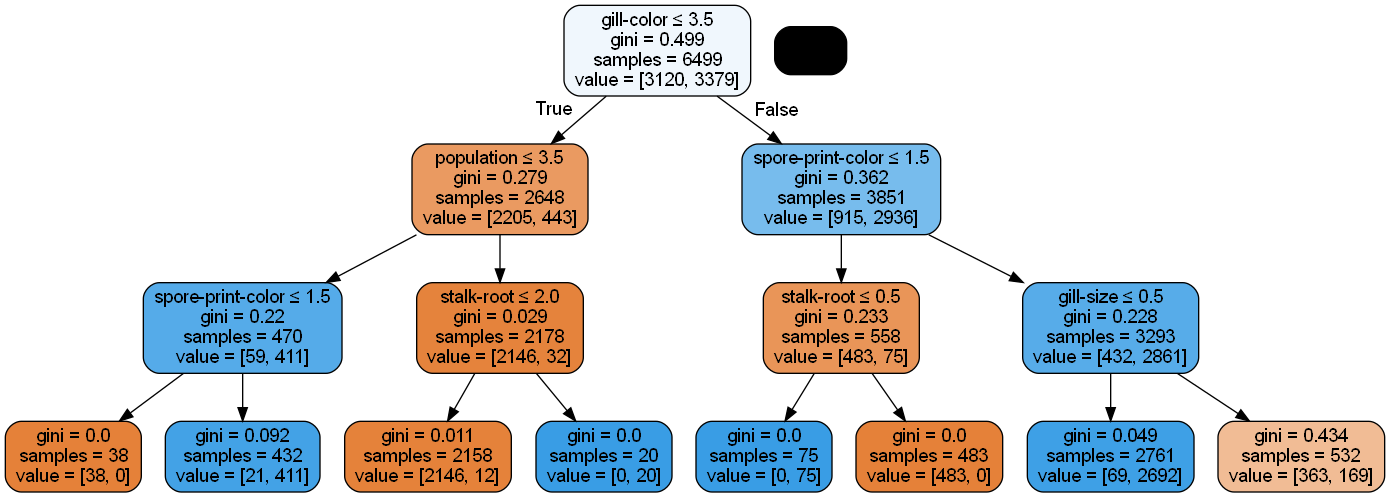

In [287]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=mr_train_x.columns  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# same for entropy

In [288]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5)                    

In [289]:
dt.fit(mr_train_x , mr_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [290]:
pred = dt.predict(mr_test_x)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [291]:
pred.shape

(1625,)

In [292]:
from sklearn.metrics import confusion_matrix
confusion_matrix(mr_test_y,pred)

array([[766,  30],
       [  9, 820]], dtype=int64)

In [293]:
from sklearn.metrics import accuracy_score
accuracy_score(mr_test_y,pred) *100

97.6

In [294]:
from sklearn.metrics import precision_score
precision_score(mr_test_y,pred) *100

96.47058823529412

In [295]:
from sklearn.metrics import f1_score
f1_score(mr_test_y,pred) *100

97.67718880285885

In [296]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [297]:
roc_auc_score(mr_test_y,pred)*100

97.57275521152204

In [298]:
roc_curve(mr_test_y,pred)

(array([0.        , 0.03768844, 1.        ]),
 array([0.        , 0.98914355, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [299]:
pred_prob = dt.predict_proba(mr_test_x)
pred_prob


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [300]:
pred_prob.shape

(1625, 2)

In [301]:
fpr,tpr,ther = roc_curve(mr_test_y,pred_prob[:,1])
fpr,tpr,ther

(array([0.        , 0.        , 0.03768844, 0.06030151, 1.        ]),
 array([0.        , 0.92762364, 0.98914355, 1.        , 1.        ]),
 array([2.        , 1.        , 0.65853659, 0.30232558, 0.        ]))

In [302]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC IS 100.0 ')

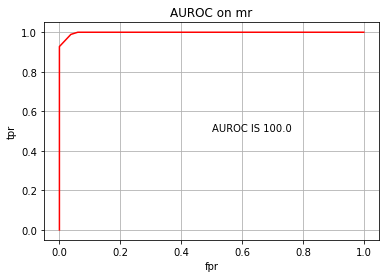

In [303]:
plt.plot(fpr,tpr,color = 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on mr')
plt.grid()
plt.text(x=.5,y=.5, s='AUROC IS 100.0 ')

# feature importance

In [304]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.10097008,
       0.        , 0.        , 0.16175378, 0.28838535, 0.        ,
       0.03969817, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.39018854,
       0.01900409, 0.        ])

In [305]:
len(dt.feature_importances_)

22

In [306]:
dt.feature_importances_.sum()

0.9999999999999999

In [307]:
mr_train_x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [308]:
len(mr_train_x.columns)

22

In [309]:
# creating data frame of three rows
feature_imp= pd.DataFrame({'feature': mr_train_x.columns,'Importance':dt.feature_importances_})
feature_imp

,feature,Importance
0,cap-shape,0.000000
1,cap-surface,0.000000
2,cap-color,0.000000
3,bruises,0.000000
4,odor,0.100970
5,gill-attachment,0.000000
6,gill-spacing,0.000000
7,gill-size,0.161754
8,gill-color,0.288385
9,stalk-shape,0.000000


In [310]:
feature_imp.sort_values('Importance',ascending = False)
# higher the value more importance is the feature 

,feature,Importance
19,spore-print-color,0.390189
8,gill-color,0.288385
7,gill-size,0.161754
4,odor,0.100970
10,stalk-root,0.039698
20,population,0.019004
0,cap-shape,0.000000
13,stalk-color-above-ring,0.000000
18,ring-type,0.000000
17,ring-number,0.000000
